In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as image
plt.style.use('ggplot')
#%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 12)

In [53]:
Monthdict={'1':'Jan', '2':'Feb', '3':'Mar', '4':'Apr', '5':'May'}

In [54]:
data = pd.read_csv('KyotoCherryFullFlowering.csv', index_col='AD')
data.dropna(inplace=True)
data.head(30)

,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
AD,,,,,
812,92.0,401.0,1.0,2.0,NIHON-KOKI
815,105.0,415.0,1.0,2.0,NIHON-KOKI
831,96.0,406.0,1.0,2.0,NIHON-KOKI
851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
864,100.0,409.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU
866,106.0,416.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU
869,95.0,405.0,5.0,2.0,KANKE-BUNSOU
889,104.0,414.0,5.0,2.0,NIPPON-SANDAI-JITSUROKU


In [55]:
#data['Date'] = data['Full-flowering date'].apply(lambda x: Monthdict[str(x)[0]]+'-'+str(x)[1:3])
data['Year'] = data.index
data['DateMean'] = data['Full-flowering date (DOY)'].rolling(window=30, center=True).mean()
data['DateStd'] = data['Full-flowering date (DOY)'].rolling(window=30, center=True).std()
data['DateMax'] = data['DateMean'] + 1.96*data['DateStd']
data['DateMin'] = data['DateMean'] - 1.96*data['DateStd']
#data.dropna(inplace=True)

In [56]:
data.head()

,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,Year,DateMean,DateStd,DateMax,DateMin
AD,,,,,,,,,,
812,92.0,401.0,1.0,2.0,NIHON-KOKI,812,NaN,NaN,NaN,NaN
815,105.0,415.0,1.0,2.0,NIHON-KOKI,815,NaN,NaN,NaN,NaN
831,96.0,406.0,1.0,2.0,NIHON-KOKI,831,NaN,NaN,NaN,NaN
851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,851,NaN,NaN,NaN,NaN
853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,853,NaN,NaN,NaN,NaN


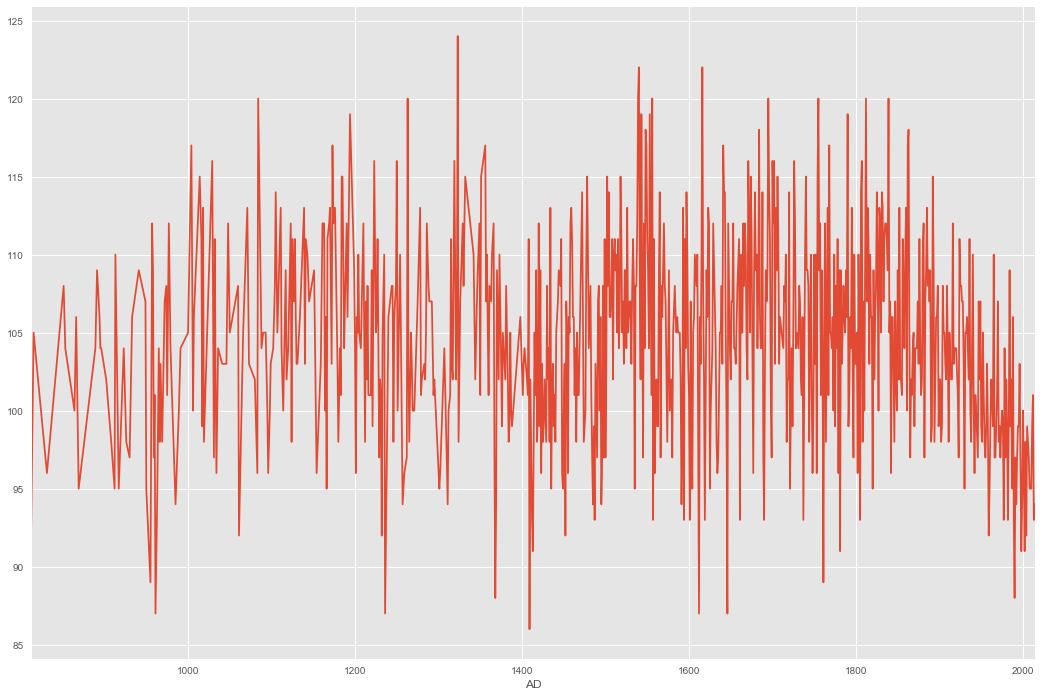

In [57]:
data['Full-flowering date (DOY)'].plot()
plt.show()

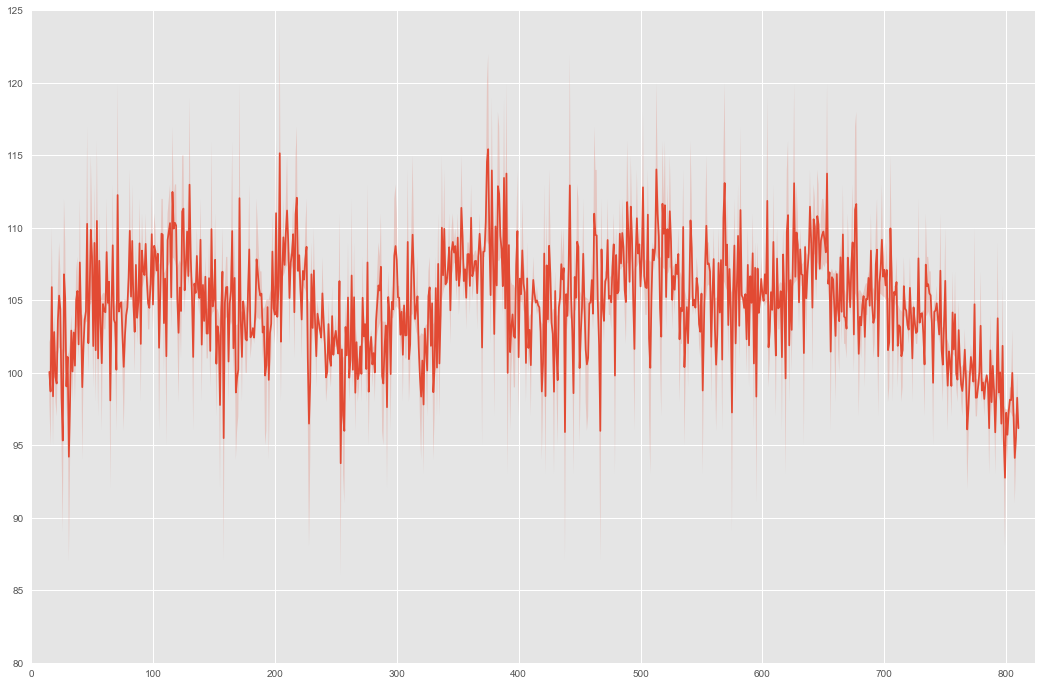

In [58]:
sns.tsplot([data['DateMean'],data['Full-flowering date (DOY)']])
plt.ylim(80,125)
plt.show()

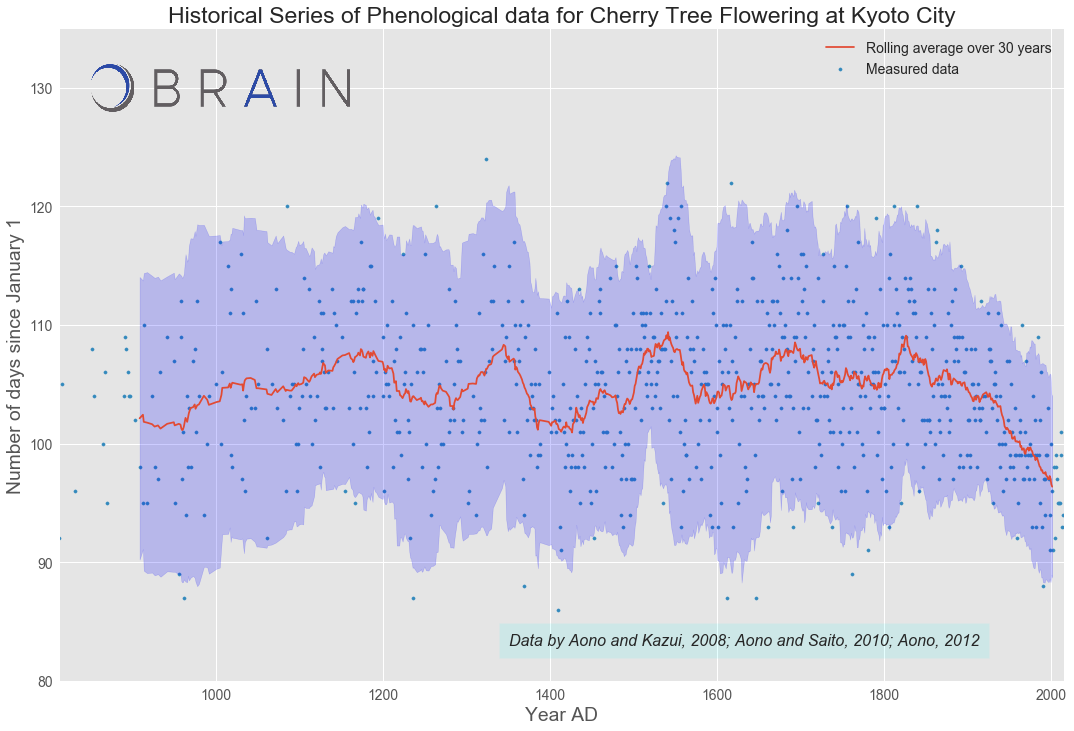

In [72]:
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'xtick.labelsize': 14})
plt.rcParams.update({'ytick.labelsize': 14})
plt.rcParams.update({'legend.fontsize': 14})
im = image.imread('../../BrainCompany/Graphics/logo2.png')
ax = data.plot.scatter(x='Year', y='Full-flowering date (DOY)', label='Measured data', s=10.) #data.DateMax.plot(ax = ax)
#data.DateMin.plot(ax = ax)
plt.fill_between(data.index, data.DateMin, data.DateMax, color='b', alpha=0.2)
data.DateMean.plot(label='Rolling average over 30 years')
#ax.set_yticklabels(data.Date)
plt.legend()
plt.ylim(80,135)
plt.title('Historical Series of Phenological data for Cherry Tree Flowering at Kyoto City')
plt.ylabel('Number of days since January 1')
plt.xlabel('Year AD')
#plt.yticks(x, labels, rotation='vertical')
ax.text(1350, 83, u'Data by Aono and Kazui, 2008; Aono and Saito, 2010; Aono, 2012',
       style='italic',
        bbox={'facecolor':'cyan', 'alpha':0.1, 'pad':10})
ax.imshow(im, aspect='auto', extent=(850, 1160, 128, 132), zorder=10)
plt.savefig('KyotoCherryFlowering.png')
plt.show()

In [10]:
data = data[(data.Year > 1250) & (data.Year < 1750)]

In [11]:
data.head(40)

,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,Year,DateMean,DateStd,DateMax,DateMin
AD,,,,,,,,,,
1251,100.0,410.0,3.0,1.0,BENN-NO-NAISHI-NIKKI,1251,103.400000,7.185234,117.483058,89.316942
1254,110.0,420.0,4.0,2.0,SAKURAE-RUIJU,1254,103.100000,7.043461,116.905184,89.294816
1257,94.0,404.0,3.0,2.0,TSUNETOSHI-KYOKI,1257,103.300000,6.948828,116.919702,89.680298
1259,96.0,406.0,3.0,1.0,MASUKAGAMI,1259,103.300000,6.948828,116.919702,89.680298
1262,97.0,407.0,7.0,9.0,EST-from-KJ(KUJOKE-REKISEI-KIROKU),1262,103.433333,6.941546,117.038763,89.827904
1263,120.0,430.0,1.0,2.0,ZOKU-HONCHOTSUKAN,1263,104.100000,6.763747,117.356944,90.843056
1264,103.0,412.0,5.0,2.0,ZOKU-SHIGUSHO,1264,104.266667,6.847770,117.688296,90.845037
1265,98.0,408.0,6.0,4.0,TAMEIE-SHU,1265,104.200000,6.799594,117.527205,90.872795
1267,105.0,415.0,4.0,2.0,MISININ-KAMPAKUKI,1267,104.866667,5.986959,116.601106,93.132227


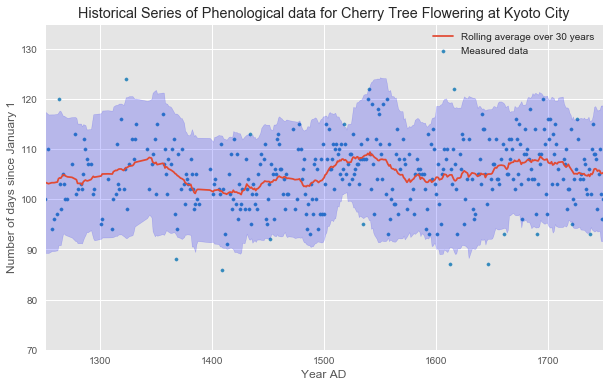

In [12]:
ax = data.plot.scatter(x='Year', y='Full-flowering date (DOY)', label='Measured data', s=10.) #data.DateMax.plot(ax = ax)
#data.DateMin.plot(ax = ax)
plt.fill_between(data.index, data.DateMin, data.DateMax, color='b', alpha=0.2)
data.DateMean.plot(label='Rolling average over 30 years')
#ax.set_yticklabels(data.Date)
plt.legend()
plt.title('Historical Series of Phenological data for Cherry Tree Flowering at Kyoto City')
plt.ylabel('Number of days since January 1')
plt.xlabel('Year AD')
#plt.yticks(x, labels, rotation='vertical')
#ax.text(1200, 80, u'Copyright: plot by Simone Conradi,\ndata by Aono and Kazui, 2008; Aono and Saito, 2010; Aono, 2012',
#       style='italic',
#        bbox={'facecolor':'cyan', 'alpha':0.1, 'pad':10})
plt.ylim(70,135)
#plt.ylim(1800, 2020)
plt.savefig('KyotoCherryFlowering.png')
plt.show()